# Chapter 6, Example 3b

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn import datasets

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

In [2]:
no_epochs = 1000

no_labels = 3
no_features = 4
hidden_units = [2, 4, 6, 8, 10, 12]

no_folds = 3
no_exps = 10

seed = 10
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
def train_exp(X, Y):

    x_train, y_train = X[:50], Y[:50]
    x_valid, y_valid = X[50:100], Y[50:100] 
    x_test, y_test = X[100:], Y[100:]

    acc = []
    for no_hidden in hidden_units:
        
        model = Sequential([
            Dense(no_hidden, activation='relu'),
            Dense(no_labels, activation='softmax')])
    
        model.compile(optimizer='sgd',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    
        history = model.fit(x_train, y_train,
                            epochs=no_epochs,
                            verbose=0,
                            use_multiprocessing=False,
                            validation_data=(x_valid, y_valid))
    
        acc_ = history.history['val_accuracy'][no_epochs-1]
        acc.append(acc_)
        # print('hidden units %d accuracy = %g'% (no_hidden, acc_))

    no_hidden = hidden_units[np.argmax(acc)]
    
    x_train, y_train = X[:100], Y[:100]
    
    model = Sequential([
                Dense(no_hidden, activation='relu'),
                Dense(no_labels, activation='softmax')])
    
    model.compile(optimizer='sgd',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                        epochs=no_epochs,
                        verbose=0,
                        use_multiprocessing=False,
                        validation_data=(x_test, y_test))
    
    return no_hidden, history.history['val_accuracy'][no_epochs-1]

In [4]:
# input data
iris = datasets.load_iris()
iris.data -= np.mean(iris.data, axis=0)

X = iris.data
Y = iris.target
no_data = len(iris.data)

no_hidden, acc = [], []
for exp in range(no_exps):
        
    idx = np.arange(no_data)
    np.random.shuffle(idx)

    no_hidden_, acc_ = train_exp(X[idx], Y[idx])
        
    no_hidden.append(no_hidden_)
    acc.append(acc_)
    print('exp %d: hidden units %d, accuracy %g'%(exp, no_hidden[exp], acc[exp]))

exp 0 hidden units 10 accuracy 0.96
exp 1 hidden units 2 accuracy 0.9
exp 2 hidden units 6 accuracy 0.92
exp 3 hidden units 6 accuracy 0.96
exp 4 hidden units 6 accuracy 0.98
exp 5 hidden units 4 accuracy 0.96
exp 6 hidden units 12 accuracy 0.98
exp 7 hidden units 2 accuracy 1
exp 8 hidden units 2 accuracy 0.98
exp 9 hidden units 4 accuracy 0.96


In [5]:
hidden_counts = np.zeros(len(hidden_units))
acc_ = np.zeros(len(hidden_units))
for exp in range(no_exps):
    hidden_counts[no_hidden[exp]//2-1] += 1
    acc_[no_hidden[exp]//2-1] += acc[exp]
    
opt_hidden = hidden_units[np.argmax(hidden_counts)]
opt_acc = acc_[opt_hidden//2-1]/hidden_counts[opt_hidden//2-1]
print('* %d hidden unit *'%opt_hidden)
print('* accuracy %g *'%opt_acc)

* 2 hidden unit *
* accuracy 0.96 *


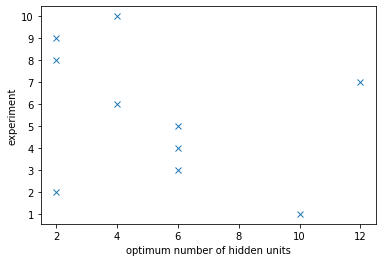

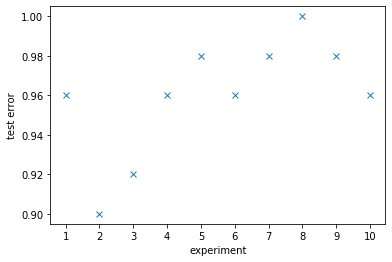

In [9]:
plt.figure(1)
plt.plot(no_hidden, range(no_exps), marker = 'x', linestyle = 'None')
plt.xticks(hidden_units)
plt.yticks(range(no_exps), np.arange(no_exps)+1)
plt.ylabel('experiment')
plt.xlabel('optimum number of hidden units')
plt.savefig('./figures/6.3b_1.png')


plt.figure(2)
plt.plot(range(no_exps), acc, marker = 'x', linestyle = 'None')
plt.xticks(range(no_exps), np.arange(no_exps)+1)
plt.xlabel('experiment')
plt.ylabel('test error')
plt.savefig('./figures/6.3b_2.png')
    
plt.show()
